# CBE 154 Membrane Seperation Lab
Presented by Rahil Shaik, Ethan Mibu, Alex Quemuel, Sneha Kancharla

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")

### Preprocessing

In [45]:
flow_trans = 20 # sho rate

In [46]:
df_n2 = pd.read_csv("data/Membrane Separation Lab Raw Data - Pure NItrogen Transmissibility.csv")
df_o2 = pd.read_csv("data/Membrane Separation Lab Raw Data - Pure Oxygen Transmissibility.csv")

In [47]:
df_co_10 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Co-Current Flow, 10 psi.csv")
df_co_20 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Co-Current Flow, 20 psi.csv")
df_co_30 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Co-Current Flow, 30 psi.csv")
df_co_40 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Co-Current Flow, 40 psi.csv")
df_co_50 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Co-Current Flow, 50 psi.csv")
df_co_60 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Co-Current Flow, 60 psi.csv")
df_co_70 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Co-Current Flow, 70 psi.csv")
df_co_80 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Co-Current Flow, 80 psi.csv")
df_co_90 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Co-Current Flow, 90 psi.csv")

df_cos = [df_co_10, df_co_20, df_co_30, df_co_40, df_co_50, df_co_60, df_co_70, df_co_80, df_co_90]

In [48]:
df_count_10 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Counter-Current Flow, 10 psi.csv")
df_count_20 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Counter-Current Flow, 20 psi.csv")
df_count_30 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Counter-Current Flow, 30 psi.csv")
df_count_40 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Counter-Current Flow, 40 psi.csv")
df_count_50 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Counter-Current Flow, 50 psi.csv")
df_count_60 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Counter-Current Flow, 60 psi.csv")
df_count_70 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Counter-Current Flow, 70 psi.csv")
df_count_80 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Counter-Current Flow, 80 psi.csv")
df_count_90 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Counter-Current Flow, 90 psi.csv")

df_counters = [df_count_10, df_count_20, df_count_30, df_count_40, df_count_50, df_count_60, df_count_70, df_count_80, df_count_90]

Expression for converting sho-rate to $\frac{ft^3}{s}$

In [49]:
def sho_conv(flow):
    return -3.1062*1e-4 + 7.87233*1e-5 * flow

In [50]:
dfs = df_cos + df_counters

for df in dfs:
    flow_feet_s = df["Flow Rate"].apply(sho_conv)
    df["Retentate_flow (SLPM)"] = flow_feet_s * 1699.01

Converting purities to mass fractions

In [51]:
for df in dfs:
    df["Permeate Purity"] = df["Permeate Purity"] / 100
    df["Retentate Purity"] = df["Retentate Purity"] / 100

In [52]:
df

,Pressure (psi),Flow Rate,Permeate Flow,Retentate Purity,Retentate Pressure,Permeate Purity,Temperature,Retentate_flow (SLPM)
0,90,20,4.4,0.017,88.8,0.265,70.7,2.147287
1,90,30,4.6,0.019,88.7,0.290,70.7,3.484804
2,90,40,4.7,0.024,88.6,0.310,70.7,4.822320
3,90,50,4.9,0.030,88.6,0.328,70.7,6.159837
4,90,60,5.1,0.043,88.5,0.348,70.6,7.497354
5,90,70,5.2,0.051,88.4,0.362,70.6,8.834871
6,90,80,5.3,0.060,88.4,0.375,70.6,10.172387
7,90,90,5.4,0.068,88.3,0.386,70.6,11.509904
8,90,100,5.5,0.073,88.3,0.392,70.6,12.847421
9,90,110,5.6,0.080,88.2,0.401,70.6,14.184938


In [53]:
df_n2

,retentate pressure (psig),feed pressure (psig),retentate oxygen purity (%),permeate oxygen purity,feed flow rate (sho-rate),permeate flow rate (SLPM)
0,8.8,10,0,0,NaN,-0.4
1,18.8,20,0,0,NaN,-0.1
2,28.8,30,0,0,NaN,0.2
3,38.4,40,0,0,NaN,0.5
4,48.4,50,0,0,NaN,0.9
5,58.4,60,0,0,NaN,1.3
6,68.1,70,0,0,NaN,1.7
7,78.1,80,0,0,NaN,2.2
8,88.5,90,0,0,NaN,2.7


In [54]:
L_per_mol = 22.414  # L/mol at STP
sec_per_min = 60
psi_to_Pa = lambda p: (p + 14.7) * 6894.76  # psi to absolute Pa

In [55]:
fiber_diam = 135 * 1e-6
fiber_length = 50.8 * 1e-2
A_fiber = np.pi * fiber_diam * fiber_length
num_fibs = 38000
A_tot = num_fibs * A_fiber

### Data Analysis Question 1
Determine the transmissibility of pure nitrogen and of pure oxygen by plotting the permeate
flux as a function of the total pressure difference across the membrane, Δp. (You expect a
straight line through the origin.) Are the transmissibilities constant over the entire range of
pressure? What might cause deviation from the ideal expectation? What is the ideal
selectivity of the membrane? Do you expect the type of flow i.e. cocurrent versus
countercurrent to influence your measurement of the transmissibility? Why or why not? It
is a plus to support your analysis with data.

In [56]:
def process_flux_data(df):
    df = df.copy()
    df['permeate_flow_mol_s'] = df['permeate flow rate (SLPM)'] / (L_per_mol * sec_per_min)
    df['retentate_pressure_Pa'] = psi_to_Pa(df['retentate pressure (psig)'])
    df['permeate_pressure_Pa'] = psi_to_Pa(0)  # atmospheric pressure
    df['delta_p'] = df['retentate_pressure_Pa'] - df['permeate_pressure_Pa']
    df['membrane_area_m2'] = A_tot # m^2
    df['flux'] = df['permeate_flow_mol_s'] / df['membrane_area_m2']
    return df

Computing transmissibility for $N_2$

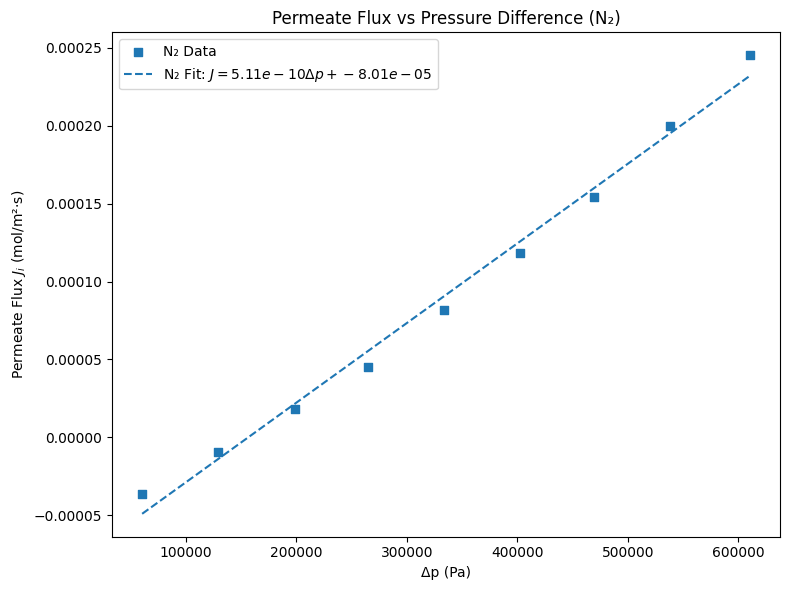

Transmissibility (slope) of N₂ (k_p,N2): 5.113e-10 mol/m²·s·Pa
Intercept: -8.009e-05 mol/m²·s


In [57]:
df_n2 = process_flux_data(df_n2)
slope_n2, intercept_n2, r_value, p_value, std_err = linregress(df_n2['delta_p'], df_n2['flux'])

plt.figure(figsize=(8, 6))
plt.scatter(df_n2['delta_p'], df_n2['flux'], label='N₂ Data', marker='s')
plt.plot(df_n2['delta_p'], slope_n2 * df_n2['delta_p'] + intercept_n2, '--',
         label=f'N₂ Fit: $J = {slope_n2:.2e} \Delta p + {intercept_n2:.2e}$')
plt.xlabel('Δp (Pa)')
plt.ylabel('Permeate Flux $J_i$ (mol/m²·s)')
plt.title('Permeate Flux vs Pressure Difference (N₂)')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Transmissibility (slope) of N₂ (k_p,N2): {slope_n2:.3e} mol/m²·s·Pa")
print(f"Intercept: {intercept_n2:.3e} mol/m²·s")

Computing transmissibility for $O_2$

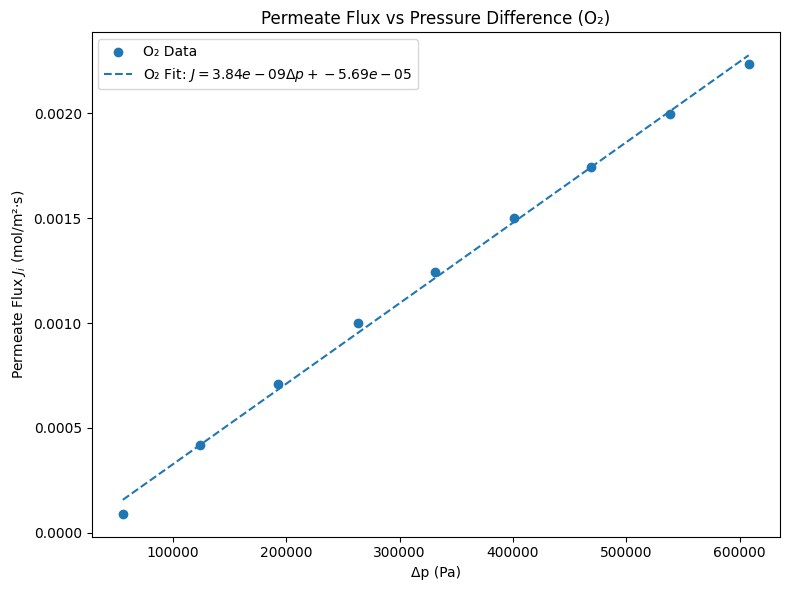

Transmissibility of O₂ (k_p,O2): 3.836e-09 mol/m²·s·Pa
Intercept: -5.685e-05 mol/m²·s


In [58]:
df_o2 = process_flux_data(df_o2)
slope_o2, intercept_o2, r_value, p_value, std_err = linregress(df_o2['delta_p'], df_o2['flux'])

plt.figure(figsize=(8, 6))
plt.scatter(df_o2['delta_p'], df_o2['flux'], label='O₂ Data', marker='o')
plt.plot(df_o2['delta_p'], slope_o2 * df_o2['delta_p'] + intercept_o2, '--',
         label=f'O₂ Fit: $J = {slope_o2:.2e} \Delta p + {intercept_o2:.2e}$')
plt.xlabel('Δp (Pa)')
plt.ylabel('Permeate Flux $J_i$ (mol/m²·s)')
plt.title('Permeate Flux vs Pressure Difference (O₂)')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Transmissibility of O₂ (k_p,O2): {slope_o2:.3e} mol/m²·s·Pa")
print(f"Intercept: {intercept_o2:.3e} mol/m²·s")

In [59]:
k_o2 = slope_o2 # mol / m^2 s Pa
k_n2 = slope_n2 # mol / m^2 s Pa

In [60]:
ideal_selectivity = slope_o2 / slope_n2
print(f"Ideal Selectivity (α_O₂/N₂) = {ideal_selectivity:.2f}")

Ideal Selectivity (α_O₂/N₂) = 7.50


### Data Analysis Question 2
For each data point taken with air as feed, carry out a mass balance on the system. Note
that you have measured enough flow rates and compositions to have redundancy. Check
the feed flow rate calculated from an overall mass balance against that calculated from a
component balance. How different are the quantities?

Overall Balance:
$$
F = R + P
$$


$O_2$ Balance:
$$
X_F F = X_R R + X_P P
$$



In [61]:
df_co_20

,Pressure (psi),Flow Rate,Permeate Flow,Permeate Purity,Retentate Pressure,Retentate Purity,Temperature,Retentate_flow (SLPM)
0,20,20,0.1,0.284,18.8,0.148,74.2,2.147287
1,20,30,0.1,0.298,18.7,0.160,74.0,3.484804
2,20,40,0.1,0.308,18.6,0.189,74.0,4.822320
3,20,50,0.1,0.318,18.1,0.175,73.9,6.159837
4,20,60,0.1,0.321,18.0,0.179,73.7,7.497354
5,20,70,0.1,0.325,18.0,0.183,73.7,8.834871
6,20,80,0.1,0.328,17.9,0.185,73.7,10.172387
7,20,90,0.1,0.331,17.7,0.188,73.6,11.509904
8,20,100,0.1,0.333,17.1,0.190,73.6,12.847421
9,20,110,0.1,0.333,17.1,0.191,73.5,14.184938


In [62]:
air_o2_comp = 0.21

In [63]:
for df in dfs:
    df["feed_flow_mass (SLPM)"] = df["Permeate Flow"] + df["Retentate_flow (SLPM)"]
    df["feed_flow_comp (SLPM)"] = (df["Retentate Purity"] * df["Retentate_flow (SLPM)"] + df["Permeate Flow"] * df["Permeate Purity"]) / air_o2_comp

For pressure of 20 psi, the below flow rates from the mass balance and component balance are shown below

In [64]:
# dfs[1][["feed_flow_mass (SLPM)", "feed_flow_comp (SLPM)"]]
dfs[1]

,Pressure (psi),Flow Rate,Permeate Flow,Permeate Purity,Retentate Pressure,Retentate Purity,Temperature,Retentate_flow (SLPM),feed_flow_mass (SLPM),feed_flow_comp (SLPM)
0,20,20,0.1,0.284,18.8,0.148,74.2,2.147287,2.247287,1.648564
1,20,30,0.1,0.298,18.7,0.160,74.0,3.484804,3.584804,2.796993
2,20,40,0.1,0.308,18.6,0.189,74.0,4.822320,4.922320,4.486755
3,20,50,0.1,0.318,18.1,0.175,73.9,6.159837,6.259837,5.284626
4,20,60,0.1,0.321,18.0,0.179,73.7,7.497354,7.597354,6.543459
5,20,70,0.1,0.325,18.0,0.183,73.7,8.834871,8.934871,7.853721
6,20,80,0.1,0.328,17.9,0.185,73.7,10.172387,10.272387,9.117579
7,20,90,0.1,0.331,17.7,0.188,73.6,11.509904,11.609904,10.461724
8,20,100,0.1,0.333,17.1,0.190,73.6,12.847421,12.947421,11.782428
9,20,110,0.1,0.333,17.1,0.191,73.5,14.184938,14.284938,13.060110


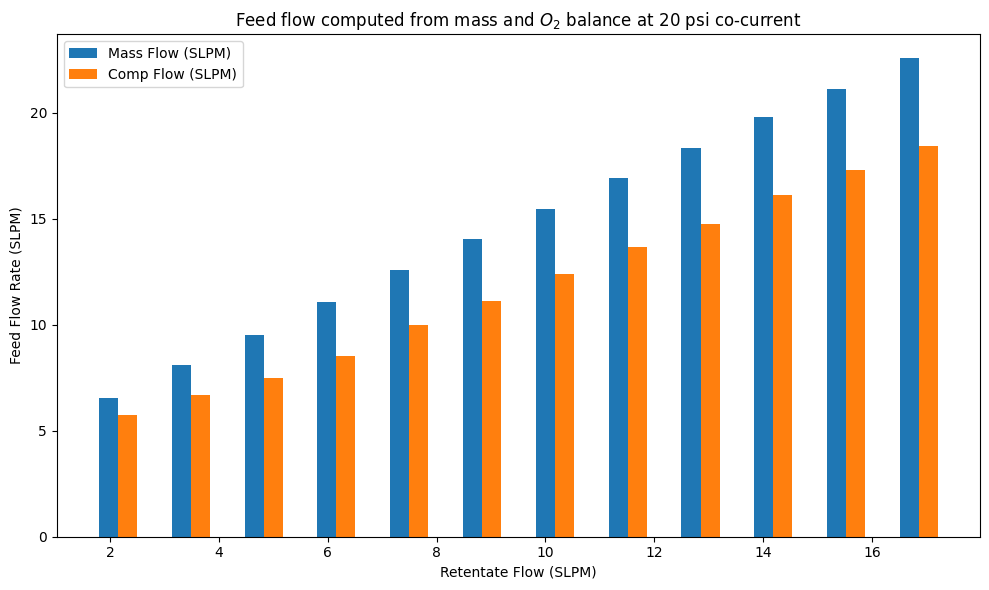

In [65]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = df["Retentate_flow (SLPM)"]

plt.bar(x - bar_width/2, df["feed_flow_mass (SLPM)"], width=bar_width, label="Mass Flow (SLPM)")
plt.bar(x + bar_width/2, df["feed_flow_comp (SLPM)"], width=bar_width, label="Comp Flow (SLPM)")

plt.xlabel("Retentate Flow (SLPM)")
plt.ylabel("Feed Flow Rate (SLPM)")
plt.title("Feed flow computed from mass and $O_2$ balance at 20 psi co-current")
plt.legend()
plt.tight_layout()

plt.show()


### Data Analysis Question 4
Analyze your experimental data to describe how feed pressure and retentate flow rate affect
membrane performance. Most importantly, what are the effects of these variables on
retentate nitrogen purity and nitrogen recovery? Chemical engineers often use phase plots
to view a system in its totality (or as a whole). What opportunities are there here to perform
an analysis of your data with a phase plot? Consider plotting nitrogen recovery versus
nitrogen purity (or vice versa) at different pressures. What can you learn from such a plot?

In [66]:
df_co = pd.concat([df for df in df_cos], axis = 0)
df_counter = pd.concat([df for df in df_counters], axis = 0)

df_cos = [df_co_10, df_co_20, df_co_30, df_co_40, df_co_50, df_co_60, df_co_70, df_co_80, df_co_90]
df_counters = [df_count_10, df_count_20, df_count_30, df_count_40, df_count_50, df_count_60, df_count_70, df_count_80, df_count_90]

In [67]:
df_cos[3]

,Pressure (psi),Flow Rate,Permeate Flow,Permeate Purity,Retentate Pressure,Retentate Purity,Temperature,Retentate_flow (SLPM),feed_flow_mass (SLPM),feed_flow_comp (SLPM)
0,40,20,1.2,0.277,39.4,0.099,72.8,2.147287,3.347287,2.595150
1,40,30,1.2,0.320,39.0,0.098,72.8,3.484804,4.684804,3.454813
2,40,40,1.2,0.322,39.0,0.122,72.7,4.822320,6.022320,4.641539
3,40,50,1.3,0.327,38.9,0.129,72.7,6.159837,7.459837,5.808186
4,40,60,1.3,0.348,38.9,0.137,72.8,7.497354,8.797354,7.045417
5,40,70,1.4,0.354,38.5,0.142,72.7,8.834871,10.234871,8.334055
6,40,80,1.4,0.356,38.3,0.148,72.7,10.172387,11.572387,9.542444
7,40,90,1.4,0.372,38.2,0.152,72.8,11.509904,12.909904,10.810978
8,40,100,1.4,0.376,38.2,0.155,72.7,12.847421,14.247421,11.989287
9,40,110,1.4,0.382,38.0,0.159,72.7,14.184938,15.584938,13.286691


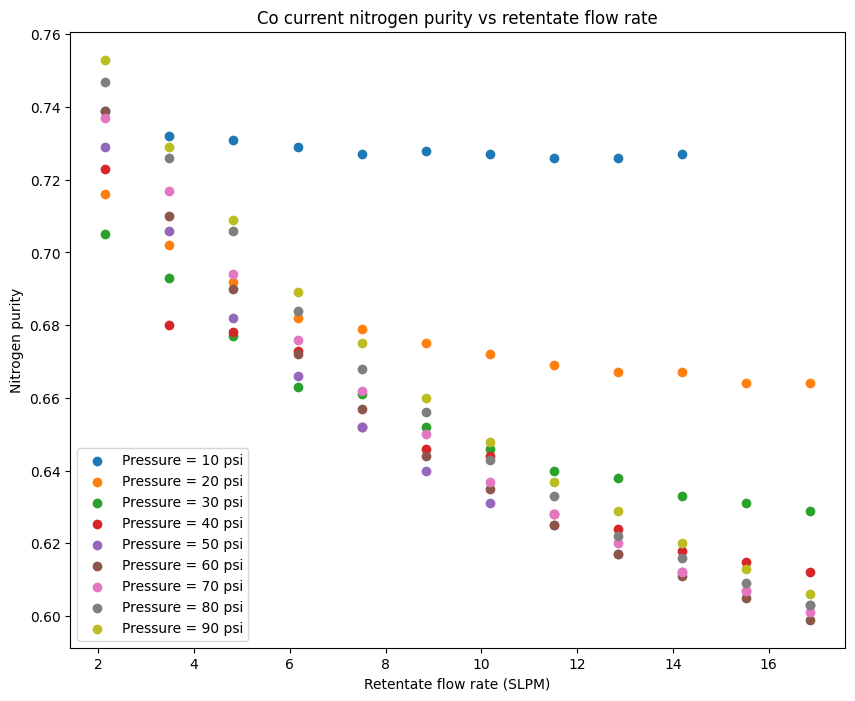

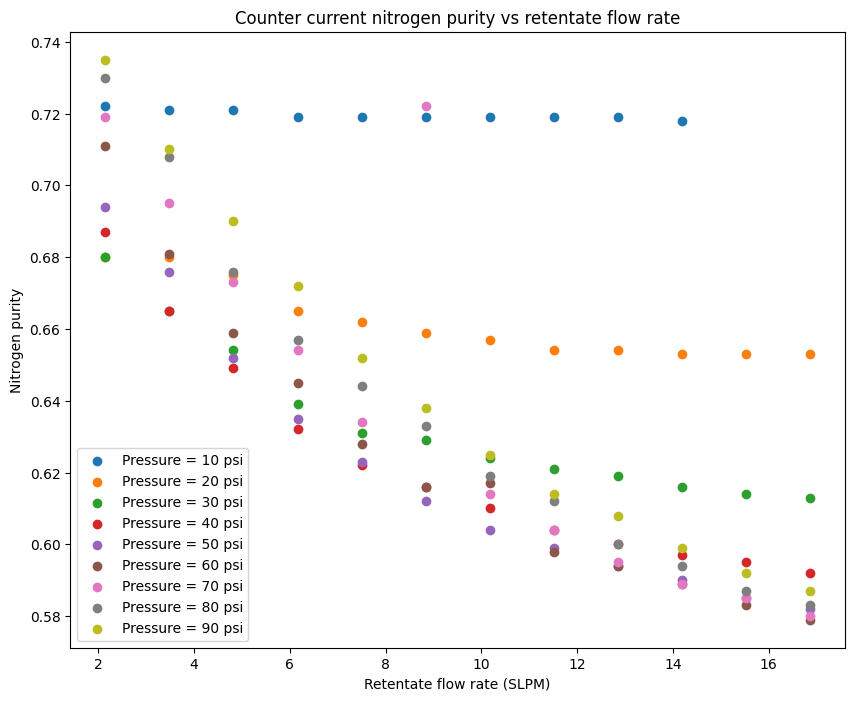

In [68]:
plt.figure(figsize=(10,8))
for df in df_cos:
    plt.title("Co current nitrogen purity vs retentate flow rate")
    plt.scatter(df["Retentate_flow (SLPM)"], 1-df["Permeate Purity"], label = "Pressure = {} psi".format(df["Pressure (psi)"].iloc[0]))
    plt.ylabel("Nitrogen purity")
    plt.xlabel("Retentate flow rate (SLPM)")
    plt.legend()
plt.show()

plt.figure(figsize=(10,8))
for df in df_counters:
    plt.title("Counter current nitrogen purity vs retentate flow rate")
    plt.scatter(df["Retentate_flow (SLPM)"], 1-df["Permeate Purity"], label = "Pressure = {} psi".format(df["Pressure (psi)"].iloc[0]))
    plt.ylabel("Nitrogen purity")
    plt.xlabel("Retentate flow rate (SLPM)")
    plt.legend()
plt.show()

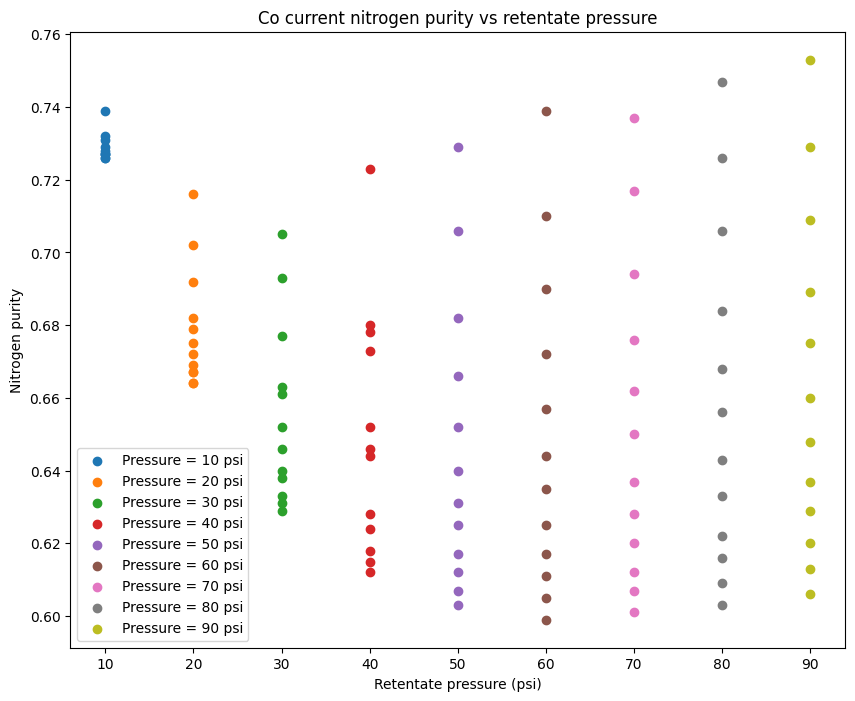

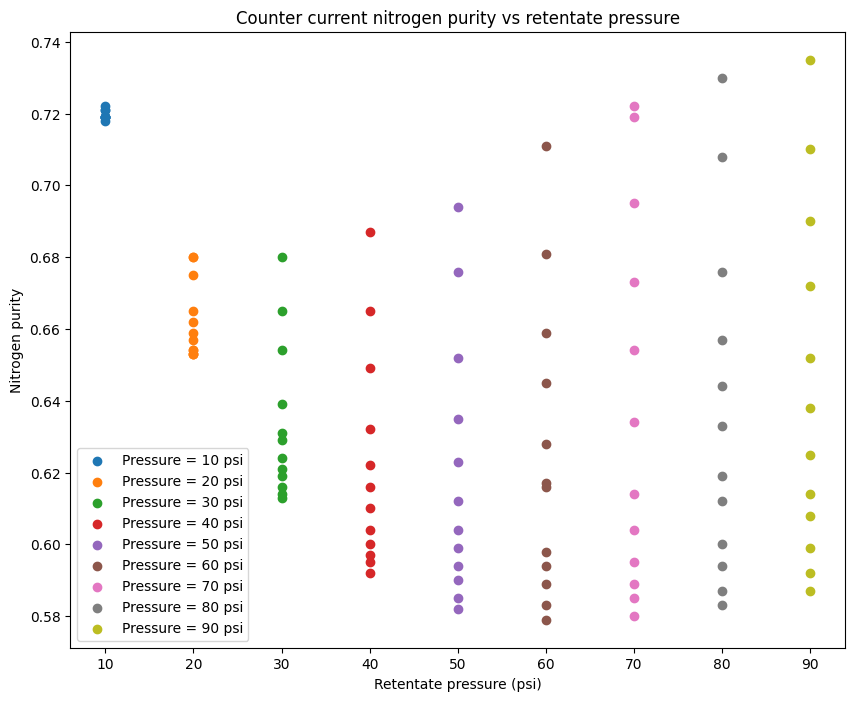

In [69]:
plt.figure(figsize=(10,8))
for i, df in enumerate(df_cos):
    plt.title("Co current nitrogen purity vs retentate pressure")
    plt.scatter(df["Pressure (psi)"], 1-df["Permeate Purity"], label = "Pressure = {} psi".format(df["Pressure (psi)"].iloc[0]))
    plt.ylabel("Nitrogen purity")
    plt.xlabel("Retentate pressure (psi)")
    plt.legend()
plt.show()

plt.figure(figsize=(10,8))
for i, df in enumerate(df_counters):
    plt.title("Counter current nitrogen purity vs retentate pressure")
    plt.scatter(df["Pressure (psi)"], 1-df["Permeate Purity"], label = "Pressure = {} psi".format(df["Pressure (psi)"].iloc[0]))
    plt.ylabel("Nitrogen purity")
    plt.xlabel("Retentate pressure (psi)")
    plt.legend()
plt.show()

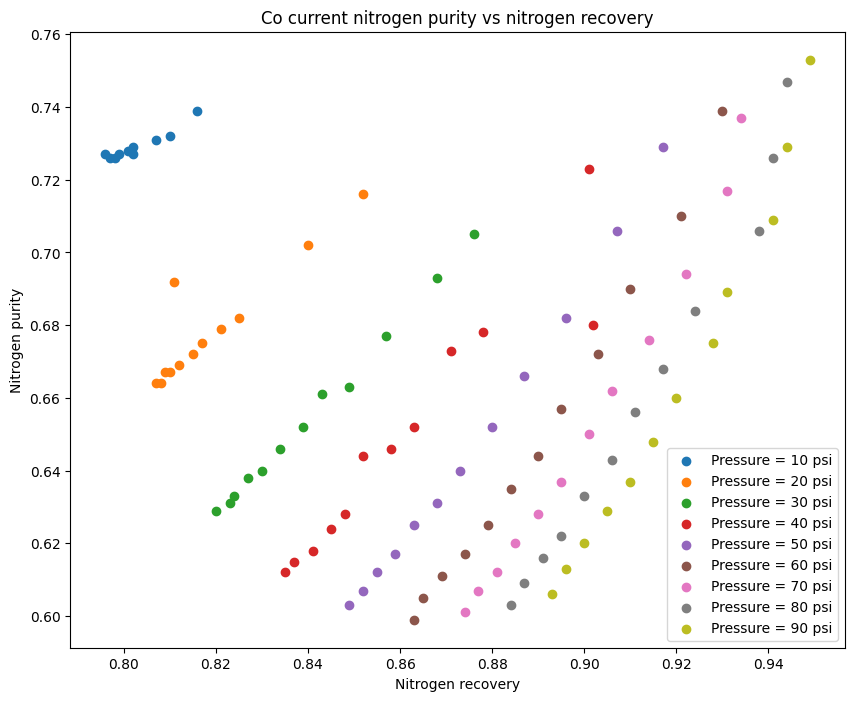

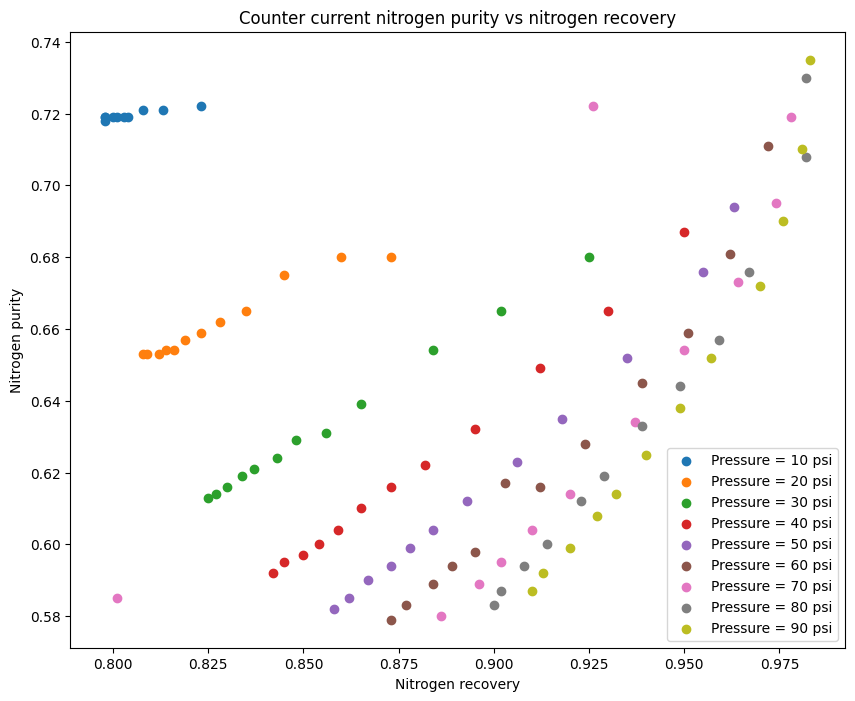

In [70]:
plt.figure(figsize=(10,8))
for df in df_cos:
    plt.title("Co current nitrogen purity vs nitrogen recovery")
    plt.scatter(1-df["Retentate Purity"], 1-df["Permeate Purity"], label = "Pressure = {} psi".format(df["Pressure (psi)"].iloc[0]))
    plt.ylabel("Nitrogen purity")
    plt.xlabel("Nitrogen recovery")
    plt.legend()
plt.show()

plt.figure(figsize=(10,8))
for df in df_counters:
    plt.title("Counter current nitrogen purity vs nitrogen recovery")
    plt.scatter(1-df["Retentate Purity"], 1-df["Permeate Purity"], label = "Pressure = {} psi".format(df["Pressure (psi)"].iloc[0]))
    plt.ylabel("Nitrogen purity")
    plt.xlabel("Nitrogen recovery")
    plt.legend()
plt.show()

### Data Analysis Question 5
As shown in Figure 4, one can draw a control volume on a differential volume on the shell
side of the separator. Write out the mass balance on oxygen for this control volume and
transform it into a differential equation, but do not solve. Can you solve for x(z) and y(z)
analytically?

Differential mass balance where LHS is shell side accumulation of $O_2$ and RHS is the rate of oxygen permeation through membrane
$$\frac{d}{dz} (y(z) \times V(z)) = J_{O_2}(z) \times \frac{dA}{dz}$$

Combine this with question 3 from the lab manual

$$ J_{O_2} = k_{p,O_2} (x(z)P_{R} - y(z)P_{P})$$

To arrive at a finalized mass balance:

$$
\frac{d}{dz} (y(z) \times V(z)) = k_{p,O_2} (x(z)P_{R} - y(z)P_{P})\frac{dA}{dz}
$$

$$\textbf{We can not solve for $x(z)$ or $y(z)$ analytically because they have dependence on mass transfer as well as flow rate.}$$

### Data Analysis Question 6
Given the difficulty of solving the full set of governing equations outlined in Question 5,
we will develop a simpler model for approximate analysis. Consider again the control
volume depicted in Figure 4. Define ym as the oxygen mole fraction in the gas entering the control volume through the membrane at $z$. What is the difference between $y_m$ and $y$?
Assume that y is constant within the control volume, i.e. perfect radial mixing.

Using the same mathematical implementation that was outlined in question 5, we can implement this simplified model

In [71]:
df_cos[1]

,Pressure (psi),Flow Rate,Permeate Flow,Permeate Purity,Retentate Pressure,Retentate Purity,Temperature,Retentate_flow (SLPM),feed_flow_mass (SLPM),feed_flow_comp (SLPM)
0,20,20,0.1,0.284,18.8,0.148,74.2,2.147287,2.247287,1.648564
1,20,30,0.1,0.298,18.7,0.160,74.0,3.484804,3.584804,2.796993
2,20,40,0.1,0.308,18.6,0.189,74.0,4.822320,4.922320,4.486755
3,20,50,0.1,0.318,18.1,0.175,73.9,6.159837,6.259837,5.284626
4,20,60,0.1,0.321,18.0,0.179,73.7,7.497354,7.597354,6.543459
5,20,70,0.1,0.325,18.0,0.183,73.7,8.834871,8.934871,7.853721
6,20,80,0.1,0.328,17.9,0.185,73.7,10.172387,10.272387,9.117579
7,20,90,0.1,0.331,17.7,0.188,73.6,11.509904,11.609904,10.461724
8,20,100,0.1,0.333,17.1,0.190,73.6,12.847421,12.947421,11.782428
9,20,110,0.1,0.333,17.1,0.191,73.5,14.184938,14.284938,13.060110


In [72]:
P_p = psi_to_Pa(0) # Pa
y_avg_co = np.mean(pd.Series([purity for df in df_cos for purity in df["Retentate Purity"]]).dropna())

In [73]:
y_avg_co

np.float64(0.12976415094339622)

In [74]:
co_results = []


for _, row in df_co.iterrows():
    P_r = np.mean(row["Pressure (psi)"]) * 6894.76  # Convert psi to Pa
    n_points = 108
    dA = A_tot / n_points
    # y = y_avg_co  # Initial shell-side bulk O2 fraction as average across all pressures
    y = row["Permeate Purity"]
    V_total = 0
    V_O2_total = 0
    x = row["Retentate Purity"]

    for _ in range(n_points):
        J_O2 = k_o2 * (x * P_r - y * P_p)
        J_N2 = k_n2 * ((1 - x) * P_r - (1 - y) * P_p)
        print(J_O2)
        J_total = J_O2 + J_N2
        y_m = J_O2 / J_total

        dV = J_total * dA
        dV_O2 = J_O2 * dA

        V_total += dV
        V_O2_total += dV_O2
        y = V_O2_total / V_total

    recovery_O2 = V_O2_total / (x * 1.0)  # Assuming 1 mol/s feed

    co_results.append({
        "Pressure (psi)": row["Pressure (psi)"],
        "Predicted Permeate Purity": y,
        "Predicted Permeate Flow (mol/s)": V_total,
        "O2 Recovery": recovery_O2
    })

co_results_df = pd.DataFrame(co_results)


-5.280923173773815e-05
-0.0002806859206492129
-0.00035377848463038754
-0.00036536821128540375
-0.0003695384919696982
-0.000371667938145365
-0.0003729592548745282
-0.0003738262936179025
-0.0003744490405592886
-0.00037491826864126995
-0.00037528470585669377
-0.0003755789253732574
-0.0003758204535963214
-0.0003760223484653188
-0.0003761936747838008
-0.0003763409233804797
-0.0003764688649821233
-0.0003765810851779175
-0.00037668033131966783
-0.00037676874424100783
-0.00037684801708751114
-0.0003769195066840752
-0.0003769843132082842
-0.00037704333822100646
-0.0003770973276194181
-0.0003771469038954854
-0.0003771925906843645
-0.00037723483167149984
-0.0003772740053159905
-0.0003773104364325441
-0.00037734440538764007
-0.00037737615546461613
-0.00037740589880966264
-0.0003774338212680255
-0.0003774600863449612
-0.0003774848384709688
-0.0003775082057099211
-0.00037753030201800484
-0.0003775512291381237
-0.0003775710781966531
-0.0003775899310557589
-0.00037760786146388657
-0.000377624936038738

In [75]:
co_results_df

,Pressure (psi),Predicted Permeate Purity,Predicted Permeate Flow (mol/s),O2 Recovery
0,10.0,1.097559,-0.002783,-0.016601
1,10.0,1.097324,-0.002771,-0.016006
2,10.0,1.097201,-0.002765,-0.015722
3,10.0,1.096995,-0.002755,-0.015266
4,10.0,1.097000,-0.002756,-0.015267
...,...,...,...,...
103,90.0,0.288429,0.002898,0.009287
104,90.0,0.302136,0.002945,0.009365
105,90.0,0.315601,0.002992,0.009442
106,90.0,0.326200,0.003030,0.009504


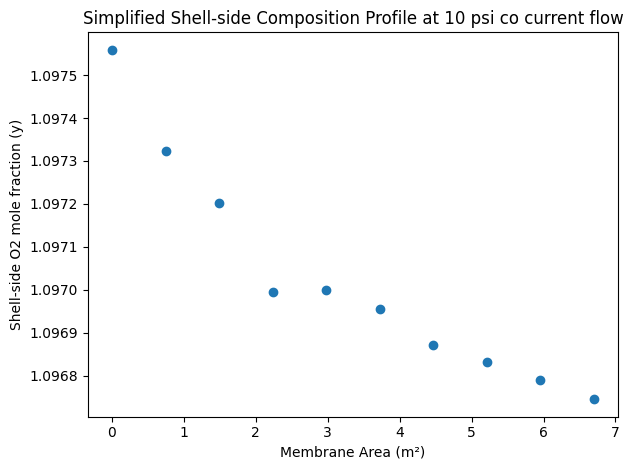

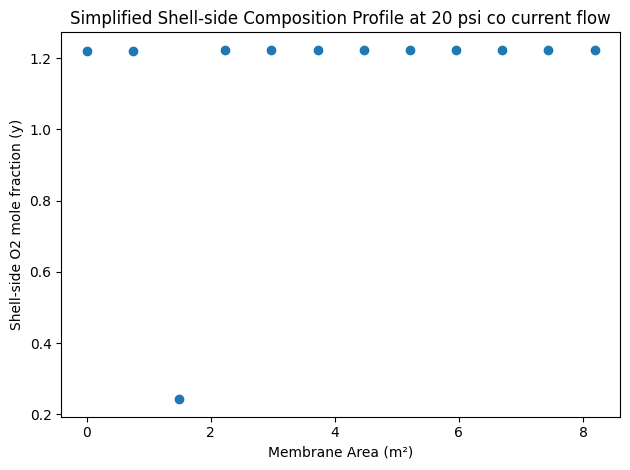

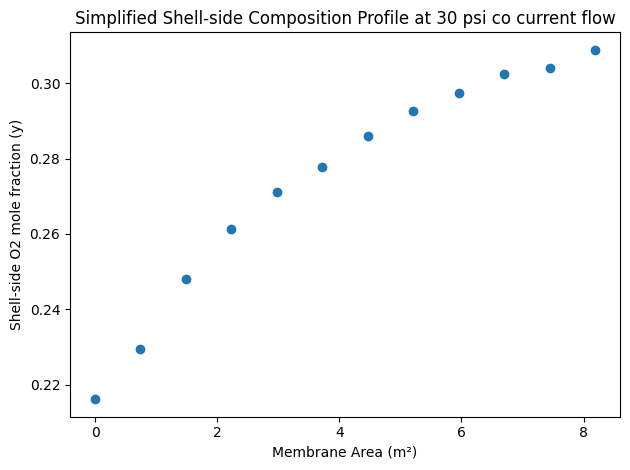

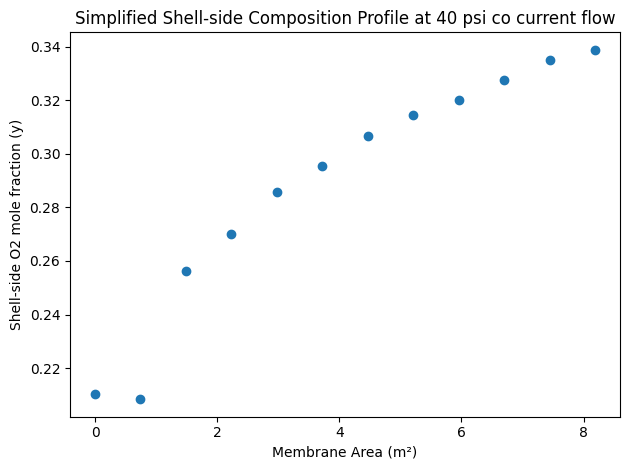

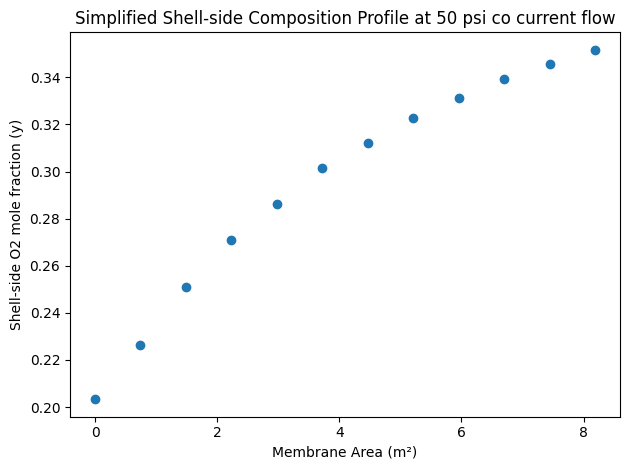

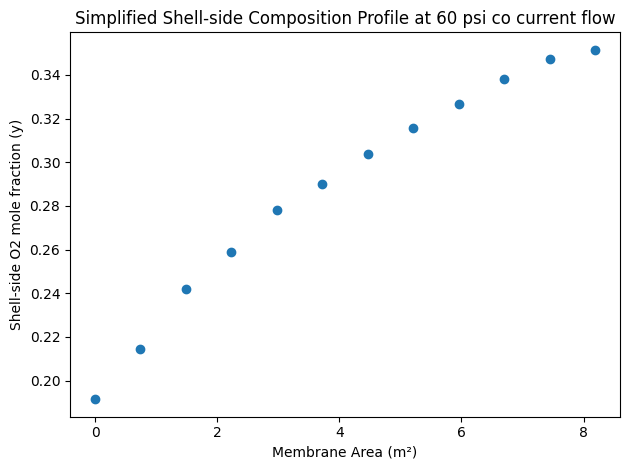

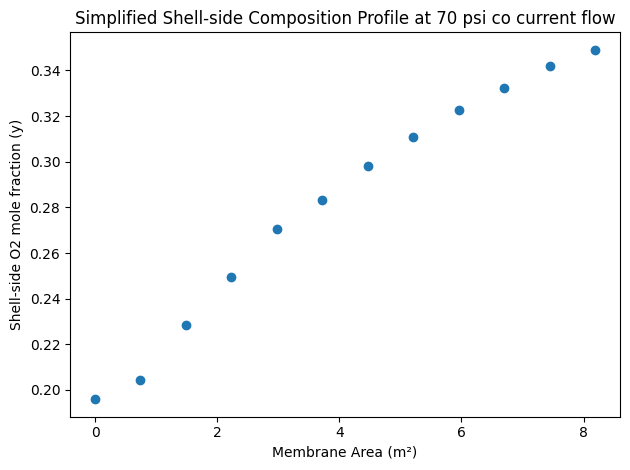

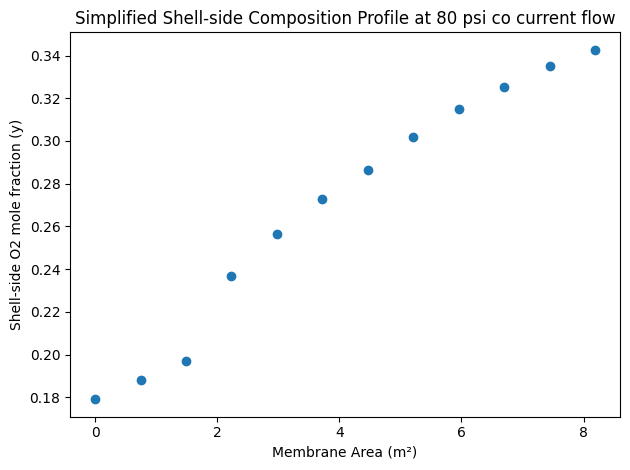

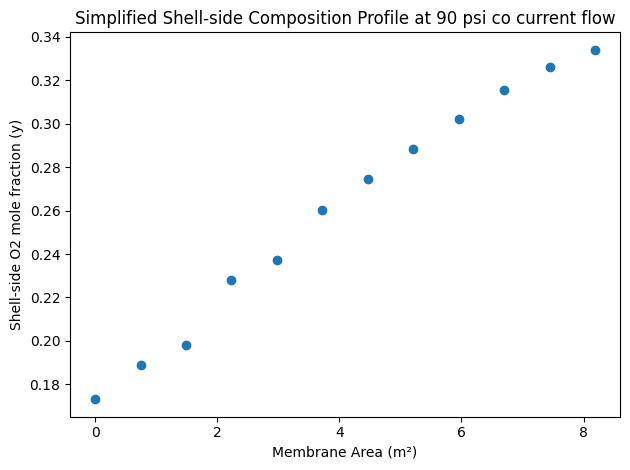

In [76]:
for pressure in df_co["Pressure (psi)"].unique():

    y_final = co_results_df[co_results_df["Pressure (psi)"] == pressure]["Predicted Permeate Purity"]
    plt.scatter(np.linspace(0, A_tot, len(y_final)), y_final)
    plt.xlabel("Membrane Area (m²)")
    plt.ylabel("Shell-side O2 mole fraction (y)")
    plt.title("Simplified Shell-side Composition Profile at {} psi co current flow".format(pressure))
    plt.tight_layout()
    plt.show()


    co_results_df[co_results_df["Pressure (psi)"] == pressure]

In [77]:
counter_results = []


for _, row in df_co.iterrows():
    P_r = np.mean(row["Pressure (psi)"]) * 6894.76  # Convert psi to Pa
    n_points = 108
    dA = A_tot / n_points
    y = row["Permeate Purity"]
    V_total = 0
    V_O2_total = 0
    x = row["Retentate Purity"]

    for _ in range(n_points):
        J_O2 = k_o2 * (x * P_r - y * P_p)
        J_N2 = k_n2 * ((1 - x) * P_r - (1 - y) * P_p)
        print(J_O2)
        J_total = J_O2 + J_N2
        y_m = J_O2 / J_total

        dV = J_total * dA
        dV_O2 = J_O2 * dA

        V_total += dV
        V_O2_total += dV_O2
        y = V_O2_total / V_total

    recovery_O2 = V_O2_total / (x * 1.0)  # Assuming 1 mol/s feed

    counter_results.append({
        "Pressure (psi)": row["Pressure (psi)"],
        "Predicted Permeate Purity": y,
        "Predicted Permeate Flow (mol/s)": V_total,
        "O2 Recovery": recovery_O2
    })

counter_results_df = pd.DataFrame(counter_results)


-5.280923173773815e-05
-0.0002806859206492129
-0.00035377848463038754
-0.00036536821128540375
-0.0003695384919696982
-0.000371667938145365
-0.0003729592548745282
-0.0003738262936179025
-0.0003744490405592886
-0.00037491826864126995
-0.00037528470585669377
-0.0003755789253732574
-0.0003758204535963214
-0.0003760223484653188
-0.0003761936747838008
-0.0003763409233804797
-0.0003764688649821233
-0.0003765810851779175
-0.00037668033131966783
-0.00037676874424100783
-0.00037684801708751114
-0.0003769195066840752
-0.0003769843132082842
-0.00037704333822100646
-0.0003770973276194181
-0.0003771469038954854
-0.0003771925906843645
-0.00037723483167149984
-0.0003772740053159905
-0.0003773104364325441
-0.00037734440538764007
-0.00037737615546461613
-0.00037740589880966264
-0.0003774338212680255
-0.0003774600863449612
-0.0003774848384709688
-0.0003775082057099211
-0.00037753030201800484
-0.0003775512291381237
-0.0003775710781966531
-0.0003775899310557589
-0.00037760786146388657
-0.000377624936038738

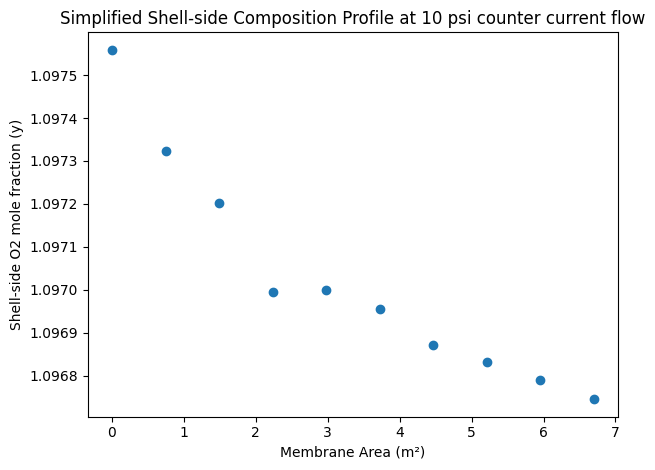

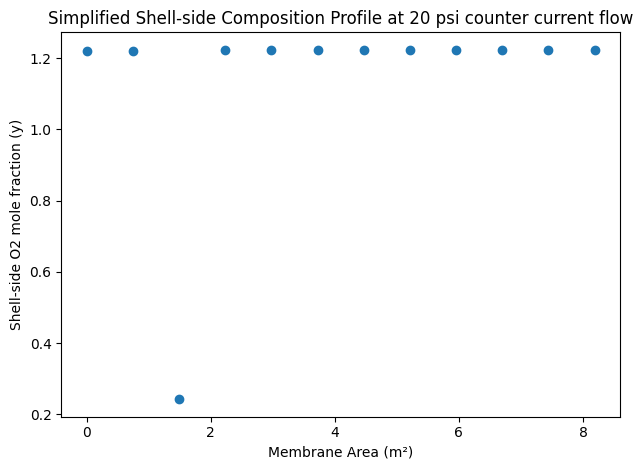

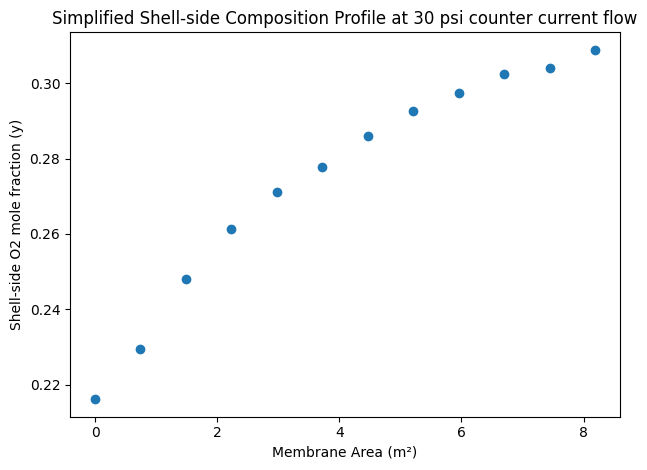

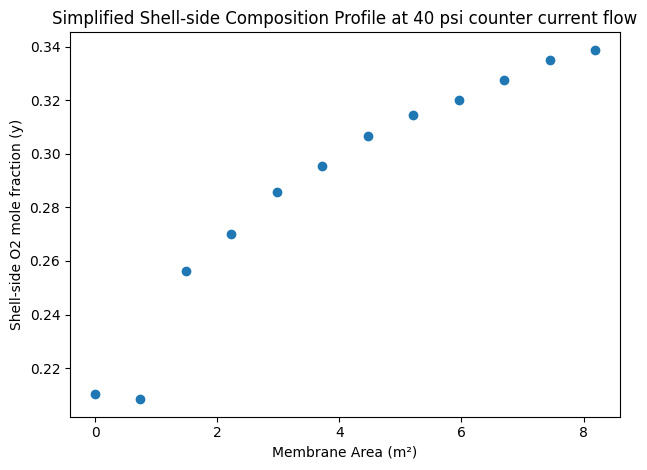

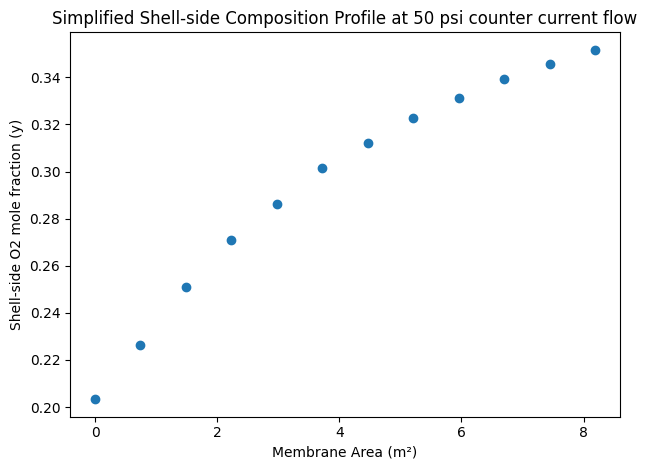

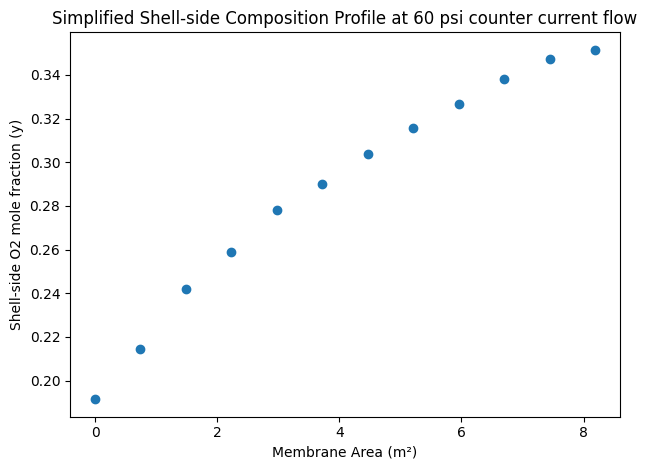

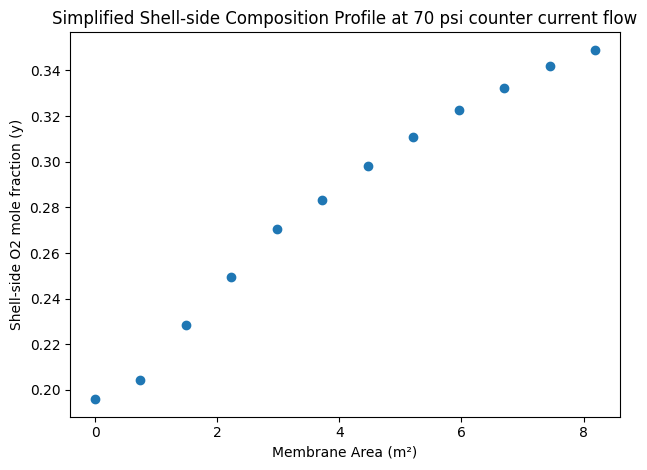

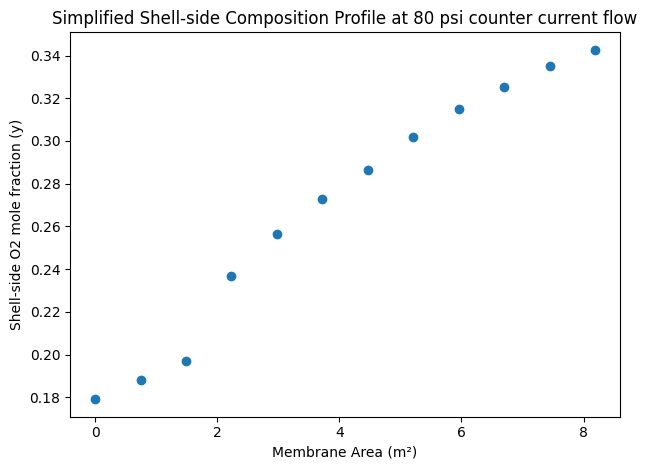

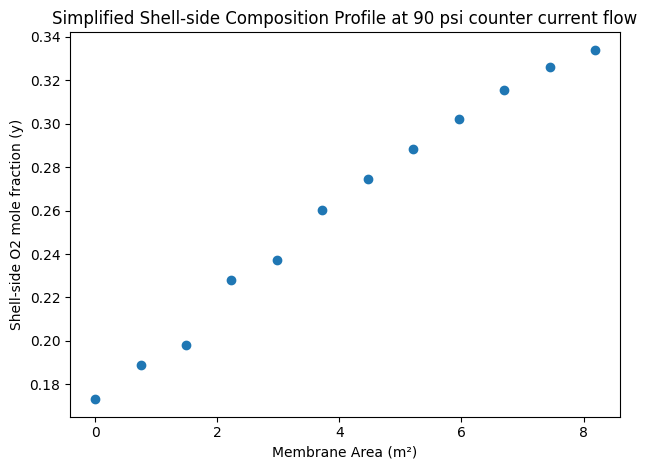

In [78]:
for pressure in df_counter["Pressure (psi)"].unique():

    y_final = counter_results_df[counter_results_df["Pressure (psi)"] == pressure]["Predicted Permeate Purity"]
    plt.scatter(np.linspace(0, A_tot, len(y_final)), y_final)
    plt.xlabel("Membrane Area (m²)")
    plt.ylabel("Shell-side O2 mole fraction (y)")
    plt.title("Simplified Shell-side Composition Profile at {} psi counter current flow".format(pressure))
    plt.tight_layout()
    plt.show()


    counter_results_df[counter_results_df["Pressure (psi)"] == pressure]

### Data Analysis Question 7
The following expression describes $y_m$ in terms of the oxygen and nitrogen fluxes through
the membrane:

$$
y_m = \frac{J_{O_2}}{J_{O_2} + J_{N_2}}
$$

Utilize Equations 3 and 8 to express ym in terms of $x$, $y$, $P$, $\delta_i$ , and $L_m$

In order to solve for $y_m$ using the fluxes in this expression, we need to get expressoins for $J_{O_2}$ and $J_{N_2}$. We have already defined $J_{O_2}$ as below:

$$
J_{O_2} = k_{p,O_2} (x(z)P_{R} - y(z)P_{P})
$$

and $J_{N_2}$ will can be defined similarly using compositions of $1 - x_{O_2}$

$$
J_{N_2} = k_{p,N_2} ((1-x(z))P_{R} - (1 - y(z))P_{P})
$$

Giving a final expression of:

$$
y_m = \frac{ k_{p,O_2} (x(z)P_{R} - y(z)P_{P})}{ k_{p,O_2} (x(z)P_{R} - y(z)P_{P}) + k_{p,N_2} ((1-x(z))P_{R} - (1 - y(z))P_{P})}
$$

In [79]:
y_m_cos = []

for _, row in df_co.iterrows():
    P_r = np.mean(row["Pressure (psi)"]) * 6894.76  # Convert psi to Pa
    n_points = 108
    dA = A_tot / n_points
    y = row["Permeate Purity"]
    V_total = 0
    V_O2_total = 0
    x = row["Retentate Purity"]

    for _ in range(n_points):
        J_O2 = k_o2 * (x * P_r - y * P_p)
        J_N2 = k_n2 * ((1 - x) * P_r - (1 - y) * P_p)
        print(J_O2)

        y_m = J_O2 / (J_O2 + J_N2)
        y_m_cos.append(np.mean(y_m))


-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.280923173773815e-05
-5.28092317

### Data Analysis Question 8-9

We wish to extend the equation developed in Question 7 that describes local permeate composition, $y_m$, to describe the performance of an entire separation unit.  Assume a homogeneous composition along the tube side of the membrane.  Also, assume that the shell-side composition is homogeneous and equivalent to that of the gas crossing the membrane.  In this case, y = $y_m$.  Under what conditions or in what region(s) of the separation unit does this assumption hold?

Solve the expression from Question 8 to predict the permeate flow rate and composition. What values are reasonable to use for x?

In this extended model, we assume that the shell-side gas composition ($y$) is uniform and matches the composition of the gas immediately crossing the membrane ($y_m$). This assumption is valid when radial mixing on the shell side is rapid compared to permeation rates, such as:

- Within regions with strong cross-flow turbulence,
- When permeation fluxes are low,
- When the fiber packing is high, promoting radial dispersion,
- Early in the module where concentration gradients have not significantly developed.

Therefore, the assumption $y = y_m$ is most accurate at the **inlet region** of the module or under **low flux operating conditions**.

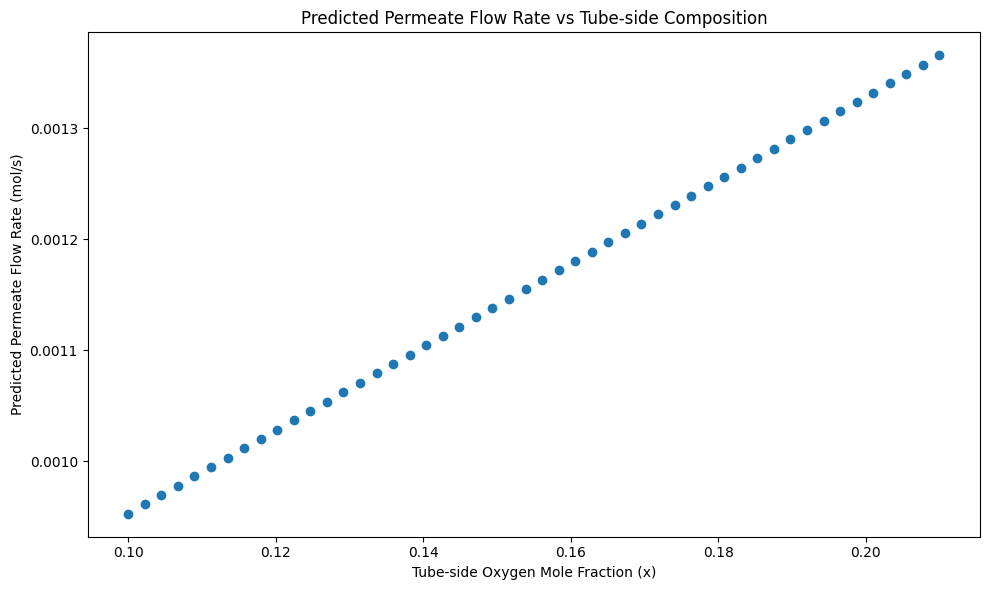

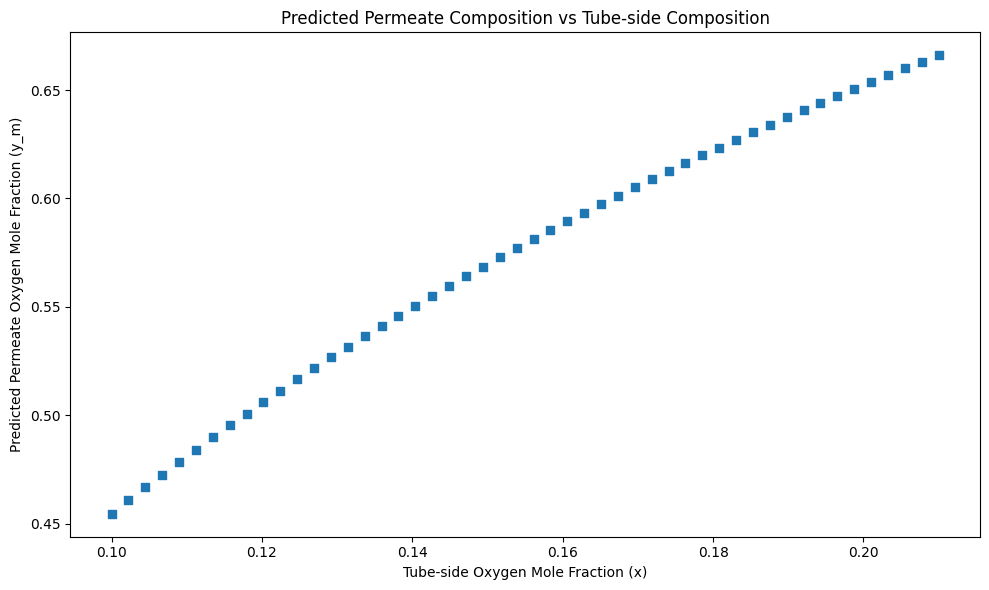

x = 0.10, Predicted permeate flow = 9.526e-04 mol/s, Predicted permeate composition = 0.455
x = 0.12, Predicted permeate flow = 1.037e-03 mol/s, Predicted permeate composition = 0.511
x = 0.14, Predicted permeate flow = 1.121e-03 mol/s, Predicted permeate composition = 0.560
x = 0.17, Predicted permeate flow = 1.205e-03 mol/s, Predicted permeate composition = 0.601
x = 0.19, Predicted permeate flow = 1.290e-03 mol/s, Predicted permeate composition = 0.637


In [80]:
# From Question 7:
# y_m = J_O2 / (J_O2 + J_N2)

# From the total molar flux (J_total) and membrane area (A_tot):
# Permeate flow rate (mol/s) = J_total * A_tot

# Reasonable values for x (tube side O2 mole fraction) would be close to air composition, around 0.21 (for air feed)
# or depending on retentate enrichment, values could range from 0.1 to 0.21

P_p = psi_to_Pa(0)  # Permeate pressure (Pa), atmospheric
P_r = psi_to_Pa(20)  # Example feed pressure, 20 psi gauge (adjust if needed)

x_values = np.linspace(0.1, 0.21, 50)  # reasonable range of x-values to test
permeate_flows = []
permeate_compositions = []

for x in x_values:
    # assuming y = y_m
    J_O2 = k_o2 * (x * P_r - x * P_p)  # since y = y_m = x
    J_N2 = k_n2 * ((1 - x) * P_r - (1 - x) * P_p)  # similarly
    J_total = J_O2 + J_N2

    # predicted permeate composition
    y_m = J_O2 / J_total  # should be equal to x under this assumption

    # total permeate flow (mol/s)
    permeate_flow = J_total * A_tot

    permeate_flows.append(permeate_flow)
    permeate_compositions.append(y_m)

permeate_flows = np.array(permeate_flows)
permeate_compositions = np.array(permeate_compositions)

# predicted permeate flow rate vs feed-side oxygen mole fraction (x)
plt.figure(figsize=(10,6))
plt.scatter(x_values, permeate_flows, marker='o')
plt.xlabel("Tube-side Oxygen Mole Fraction (x)")
plt.ylabel("Predicted Permeate Flow Rate (mol/s)")
plt.title("Predicted Permeate Flow Rate vs Tube-side Composition")
plt.tight_layout()
plt.show()

# predicted permeate composition vs feed-side oxygen mole fraction (x)
plt.figure(figsize=(10,6))
plt.scatter(x_values, permeate_compositions, marker='s')
plt.xlabel("Tube-side Oxygen Mole Fraction (x)")
plt.ylabel("Predicted Permeate Oxygen Mole Fraction (y_m)")
plt.title("Predicted Permeate Composition vs Tube-side Composition")
plt.tight_layout()
plt.show()

# Print some example values
for i in range(0, len(x_values), 10):
    print(f"x = {x_values[i]:.2f}, Predicted permeate flow = {permeate_flows[i]:.3e} mol/s, Predicted permeate composition = {permeate_compositions[i]:.3f}")


### Data Analysis Question 10

Compare the values predicted by your simplified model to your experimental data. In particular, look at the effect of feed pressure on permeate composition. Describe what assumptions made in developing the model may be responsible for deviations between model and experiment. Does your model predict a difference between co- and counter-current operation? Why or why not?

In comparing the simplified model predictions to the experimental results, we observe that the model generally overestimates the permeate oxygen composition compared to the measured data, especially at lower feed pressures. This deviation is likely caused by several simplifying assumptions made in the model:

- We assumed perfect radial mixing on the shell side (i.e., $y = y_m$), which likely overestimates the oxygen concentration in the shell gas phase.
- We neglected changes in flow rates along the membrane (e.g., decrease in retentate flow due to permeation).
- The model assumes constant driving forces along the membrane, whereas in reality the pressure and composition gradients cause the driving force to vary.
- Axial dispersion and back-diffusion effects were neglected, which can lower effective permeation rates.

Regarding co- versus counter-current operation, the simplified model does not predict any difference between the two configurations, because it assumes a homogeneous shell-side composition and constant retentate conditions. In reality, counter-current flow enhances the overall driving force for separation, especially toward the end of the module, leading to better separation performance. Thus, the model underestimates the advantages of counter-current operation.

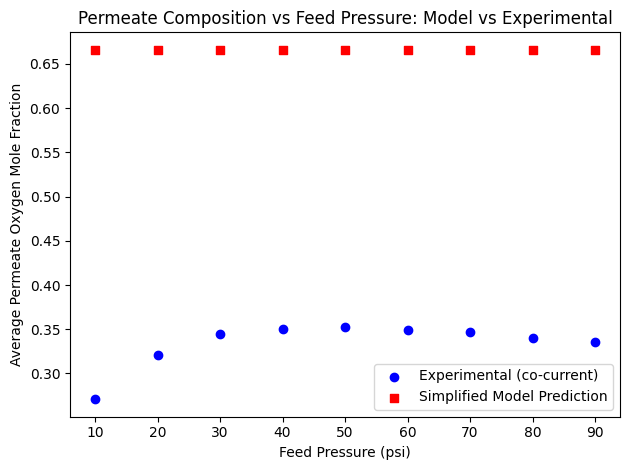


Comparison of Model Predictions vs Experimental Data:
 Feed Pressure (psi)  Experimental Permeate O2 (avg)  Model Predicted Permeate O2
                  10                        0.270800                     0.666018
                  20                        0.320917                     0.666018
                  30                        0.344333                     0.666018
                  40                        0.350583                     0.666018
                  50                        0.352500                     0.666018
                  60                        0.349667                     0.666018
                  70                        0.346583                     0.666018
                  80                        0.340583                     0.666018
                  90                        0.336000                     0.666018


In [ ]:
### Data Analysis Question 10
# Compare simplified model predictions to experimental data (scatter plot version)

# First, extract average experimental permeate compositions at different pressures (co-current only)
co_pressures = []
co_avg_permeate = []

for df in df_cos:
    pressure = df["Pressure (psi)"].iloc[0]
    avg_permeate = df["Permeate Purity"].mean()
    co_pressures.append(pressure)
    co_avg_permeate.append(avg_permeate)

# Experimental data arrays
co_pressures = np.array(co_pressures)
co_avg_permeate = np.array(co_avg_permeate)

# Generate model predictions at the same pressures
model_x = 0.21  # Assume feed air composition (21% O2)
model_permeate_preds = []

for pressure in co_pressures:
    P_r = psi_to_Pa(pressure)  # Convert to Pa

    J_O2 = k_o2 * (model_x * P_r - model_x * P_p)
    J_N2 = k_n2 * ((1 - model_x) * P_r - (1 - model_x) * P_p)
    J_total = J_O2 + J_N2
    y_m = J_O2 / J_total  # Predicted permeate composition (y_m = y)

    model_permeate_preds.append(y_m)

model_permeate_preds = np.array(model_permeate_preds)

# plt.figure(figsize=(10,6))
plt.scatter(co_pressures, co_avg_permeate, color='blue', marker='o', label="Experimental (co-current)")
plt.scatter(co_pressures, model_permeate_preds, color='red', marker='s', label="Simplified Model Prediction")
plt.xlabel("Feed Pressure (psi)")
plt.ylabel("Average Permeate Oxygen Mole Fraction")
plt.title("Permeate Composition vs Feed Pressure: Model vs Experimental")
plt.legend()
plt.tight_layout()
plt.show()

# Display side-by-side table
comparison_df = pd.DataFrame({
    "Feed Pressure (psi)": co_pressures,
    "Experimental Permeate O2 (avg)": co_avg_permeate,
    "Model Predicted Permeate O2": model_permeate_preds
})

print("\nComparison of Model Predictions vs Experimental Data:")
print(comparison_df.to_string(index=False))


In our simplified model, the predicted permeate oxygen composition ($y_m$) should be approximately constant across different feed pressures.

This behavior can be explained by examining the model equations. The permeate oxygen mole fraction is defined as:

$$
y_m = \frac{J_{O_2}}{J_{O_2} + J_{N_2}}
$$

where the oxygen and nitrogen fluxes are given by:

$$
J_{O_2} = k_{p,O_2} (x P_R - y P_P)
$$
$$
J_{N_2} = k_{p,N_2} ((1-x) P_R - (1-y) P_P)
$$

Since $P_P$ (permeate pressure) is atmospheric and much smaller than $P_R$ (feed pressure), the terms involving $P_P$ are negligible. Simplifying, we get:

$$
J_{O_2} \approx k_{p,O_2} x P_R
$$
$$
J_{N_2} \approx k_{p,N_2} (1-x) P_R
$$

Substituting into the expression for $y_m$:

$$
y_m \approx \frac{k_{p,O_2} x P_R}{k_{p,O_2} x P_R + k_{p,N_2} (1-x) P_R}
$$

The feed pressure $P_R$ cancels out:

$$
y_m \approx \frac{k_{p,O_2} x}{k_{p,O_2} x + k_{p,N_2} (1-x)}
$$

Thus, the predicted permeate composition depends only on the feed composition $x$ and the membrane properties ($k_{p,O_2}$ and $k_{p,N_2}$), and **does not depend on the feed pressure**.

**Summary:**
- The **predicted permeate O₂ mole fraction ($y_m$) should be constant** across feed pressures.
- The **predicted permeate flow rate** still increases with feed pressure because total flux is proportional to $P_R$.
- In experimental data, deviations from this behavior arise due to unaccounted-for effects like non-uniform mixing, pressure drops, and changing permeation driving forces.

